In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_partidos = pd.read_csv("./data/partidos_cebollitas.csv")

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [8]:
df_partidos[["tiros_arco_local_norm"]] = scaler_minmax.fit_transform(df_partidos[["tiros_arco_local"]])
df_partidos[["tiros_arco_visitante_norm"]] = scaler_minmax.fit_transform(df_partidos[["tiros_arco_visitante"]])
df_partidos[["tiros_arco_local_norm", "tiros_arco_visitante_norm"]].head(9)

,tiros_arco_local_norm,tiros_arco_visitante_norm
0,1.000000,0.333333
1,1.000000,0.000000
2,0.777778,0.444444
3,0.000000,0.000000
4,0.444444,1.000000
5,0.555556,0.888889
6,0.111111,0.555556
7,0.222222,0.222222
8,0.666667,0.666667


In [9]:
df_partidos["posesion_local (%)_std"] = scaler_standard.fit_transform(df_partidos[["posesion_local (%)"]])
df_partidos["posesion_visitante (%)_std"] = scaler_standard.fit_transform(df_partidos[["posesion_visitante (%)"]])

df_partidos[["posesion_local (%)_std", "posesion_visitante (%)_std", "posesion_local (%)", "posesion_visitante (%)"]].head(9)

,posesion_local (%)_std,posesion_visitante (%)_std,posesion_local (%),posesion_visitante (%)
0,0.624415,-0.624415,54,46
1,1.623479,-1.623479,60,40
2,0.790926,-0.790926,55,45
3,1.123947,-1.123947,57,43
4,0.291394,-0.291394,52,48
5,1.623479,-1.623479,60,40
6,-0.208138,0.208138,49,51
7,0.957436,-0.957436,56,44
8,1.623479,-1.623479,60,40


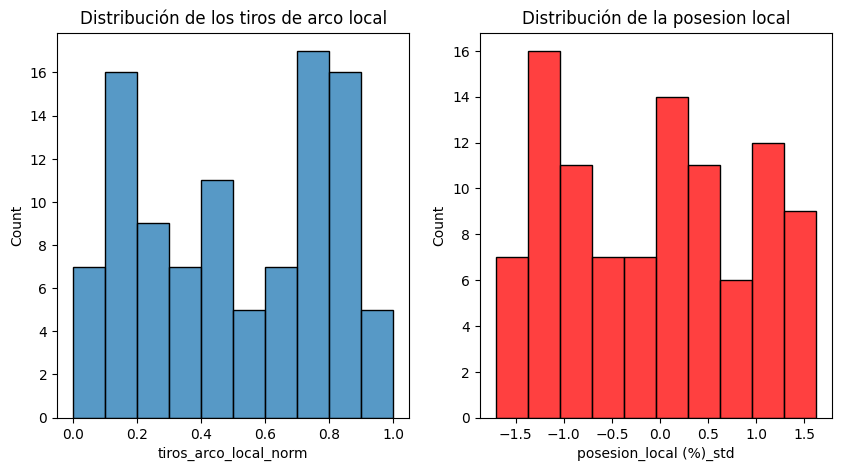

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df_partidos["tiros_arco_local_norm"], bins=10, ax=ax[0])
ax[0].set_title("Distribución de los tiros de arco local")
sns.histplot(df_partidos["posesion_local (%)_std"], bins=10, ax=ax[1], color="red")
ax[1].set_title("Distribución de la posesion local")
plt.show()
